In [1]:
import os
import pandas as pd 
import numpy as np 

# visualisation
import matplotlib.pylab as plt
import matplotlib.font_manager as fm

# our scripts 
import src.processing as sp 
import settings as st
import utils.helpers as hp
import utils.imaging as ui

### Correct for the locations of the images 

In [2]:
# dr5_desc = sp.correct_location('gz_decals_volunteers_5', save = True, filename='decals_5_votes')

### Generate the descriptions for spiral and elliptical 

In [3]:
dr5_desc = hp.read_parquet(st.data_dir, 'descriptions/decals_5_votes')

In [9]:
# we need the locations of the images for test phase 
# locs = list(map(lambda x: st.decals + '/' + x, dr5_desc['png_loc'].values))
# hp.save_pickle(locs, 'supplement', 'image_locations')

In [12]:
# dr5_spiral = sp.filtering(dr5_desc, st.condition_spiral, save=False, filename = 'decals_5_spiral')

In [13]:
# dr5_elliptical = sp.filtering(dr5_desc, st.condition_elliptical, save=False, filename = 'decals_5_elliptical')

In [3]:
# dr5_mergers = sp.filtering(dr5_desc, st.condition_merger, save=False, filename = 'decals_5_merger')

In [5]:
# dr5_strong_bar = sp.filtering(dr5_desc, st.condition_strong_bar, save=False, filename = 'decals_5_strong_bar')

In [3]:
# dr5_bulge_round = sp.filtering(dr5_desc, st.condition_bulge_round, save=False, filename = 'decals_5_bulge_round')

In [4]:
dr5_major_disturbance = sp.filtering(dr5_desc, st.condition_major_disturbance, save=False, filename = 'decals_5_major_disturbance')

In [7]:
dr5_mergers.shape

(320, 128)

In [8]:
dr5_strong_bar.shape

(259, 128)

In [4]:
dr5_bulge_round.shape

(1370, 128)

In [5]:
dr5_major_disturbance.shape

(111, 128)

In [20]:
test = hp.load_pickle('test-images', 'J090935.20+193030.8.scores')

In [33]:
hp.load_pickle('test-images', 'J090935.20+193030.8').png_loc

757    J090/J090935.20+193030.8.png
Name: png_loc, dtype: object

In [37]:
sub = test[test.scores > 0.95]

In [38]:
dr5_desc[dr5_desc.iauname.isin(sub.iauname)].png_loc

2      J104/J104629.54+115415.1.png
5      J100/J100927.56+071112.4.png
9      J135/J135942.73+010637.3.png
10     J103/J103826.56+013814.6.png
11     J095/J095431.99+064902.7.png
                   ...             
492    J150/J150749.08-012854.8.png
493    J101/J101437.74+304633.2.png
495    J114/J114241.61+275322.5.png
496    J113/J113357.43+320308.5.png
498    J115/J115331.29-022637.0.png
Name: png_loc, Length: 215, dtype: object

### Plot an example

In [41]:
img1 = ui.load_image_full(st.decals + '/' + 'J090/J090935.20+193030.8.png')
img2 = ui.load_image_full(st.decals + '/' + 'J135/J135942.73+010637.3.png')

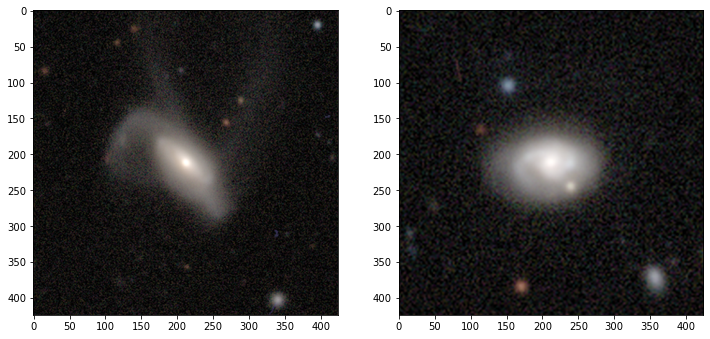

In [42]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(img1[1])
plt.subplot(122)
plt.imshow(img2[1])
plt.show()

### Subset of the different categories

In [17]:
# df_spiral= sp.subset_df(dr5_spiral, 3000, random=True, save=True, filename='subset_spiral')

In [18]:
# df_elliptical = sp.subset_df(dr5_elliptical, 3000, random=True, save=True, filename='subset_elliptical')

In [9]:
# df_strong_bar = sp.subset_df(dr5_strong_bar, 250, random=True, save=False, filename='subset_strong_bar')

In [10]:
# df_mergers = sp.subset_df(dr5_strong_bar, 250, random=True, save=False, filename='subset_mergers')

In [5]:
# df_bulge_round = sp.subset_df(dr5_bulge_round, 250, random=True, save=False, filename='subset_bulge_round')

In [24]:
# df_major_disturbance = sp.subset_df(dr5_major_disturbance, 100, random=True, save=False, filename='subset_major_disturbance')

### Move data
Given a pandas dataframe, copy images from Mike's folder to our folder.

In [2]:
df_spiral = hp.read_parquet(st.data_dir, 'descriptions/subset_spiral')
df_elliptical = hp.read_parquet(st.data_dir, 'descriptions/subset_elliptical')

In [3]:
# sp.copy_images(df_spiral, 'spiral')
# sp.copy_images(df_elliptical, 'elliptical')

3000 images saved to /data/phys-zooniverse/phys2286/data/images/spiral/
3000 images saved to /data/phys-zooniverse/phys2286/data/images/elliptical/


In [26]:
# sp.copy_images(df_mergers, 'mergers')
# sp.copy_images(df_strong_bar, 'strong_bar')
# sp.copy_images(df_bulge_round, 'bulge_round')
sp.copy_images(df_major_disturbance, 'major_disturbance')

100 images saved to /data/phys-zooniverse/phys2286/data/images/major_disturbance/


### Split the data into Training/Validation

In [2]:
d = sp.split_data(['spiral', 'elliptical'], val_size = 0.25, test_size = 0.25, save=True)

In [9]:
d['spiral']['test'].shape

(750, 128)

In [10]:
d['spiral']['validate'].shape

(750, 128)

In [11]:
d['spiral']['train'].shape

(1500, 128)

### Generate the Training/Validation sets (images)

In [2]:
# sp.images_train_validate_test(['spiral', 'elliptical'])

# Test